<a href="https://colab.research.google.com/github/KumarADK/House_price_prediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

#set random seed for reproducibility
np.random.seed(105)

#generate synthetic dtata(1000 sample)
size = np.random.randint(900,9000,1000)
bedrooms = np.random.randint(3,12,1000)
location = np.random.randint(3, 22,1000)
age = np.random.randint(3,91,1000)

# Generate House Prices with some noise
price =(size * 300) + (bedrooms * 50000) + (location * 20000) - (age * 2000) + np.random.randint(-20000,20000,1000)

# Create DataFrame
df = pd.DataFrame({"Size": size,"Bedrooms": bedrooms,"Location": location,"Age": age,"Price": price})

# Save to csv
csv_filename ="house price_data.csv"
df.to_csv(csv_filename,index=False)

print(f" dataset saved as '{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")

 dataset saved as 'house price_data.csv' with 1000 rows and 5 columns.


In [ ]:
import pandas as pd

#load dataset (make sure to update path if needed)
df=pd.read_csv("house price_data.csv")

#display first few rows of the dataset
print(df.head())

   Size  Bedrooms  Location  Age    Price
0  7748         4         5   24  2577822
1  5625         5         7   89  1900730
2  3738         3        21   79  1527264
3   973        10         5   28   825423
4  8296         3        12   73  2717926


In [ ]:
# check for missing values
print("\nMissing values:\n",df.isnull().sum())

#summary  statisyics
print("\nDataset Summary:\n",df.describe())


Missing values:
 Size        0
Bedrooms    0
Location    0
Age         0
Price       0
dtype: int64

Dataset Summary:
               Size     Bedrooms     Location          Age         Price
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   5006.269000     6.973000    11.920000    45.065000  1.999274e+06
std    2343.639788     2.586302     5.543856    25.145916  7.319499e+05
min     900.000000     3.000000     3.000000     3.000000  4.695760e+05
25%    2918.500000     5.000000     7.000000    22.000000  1.389142e+06
50%    5009.500000     7.000000    12.000000    45.000000  1.996712e+06
75%    7042.000000     9.000000    17.000000    66.000000  2.618838e+06
max    8998.000000    11.000000    21.000000    90.000000  3.525742e+06


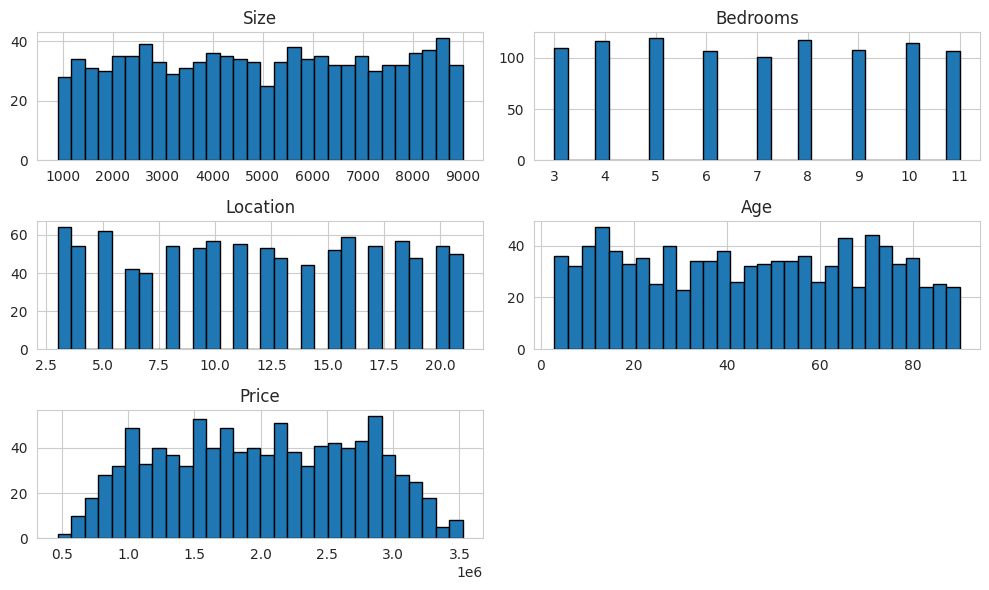

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#set plot style
sns.set_style("whitegrid")

#plot feature distribution
df.hist(figsize=(10,6),bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

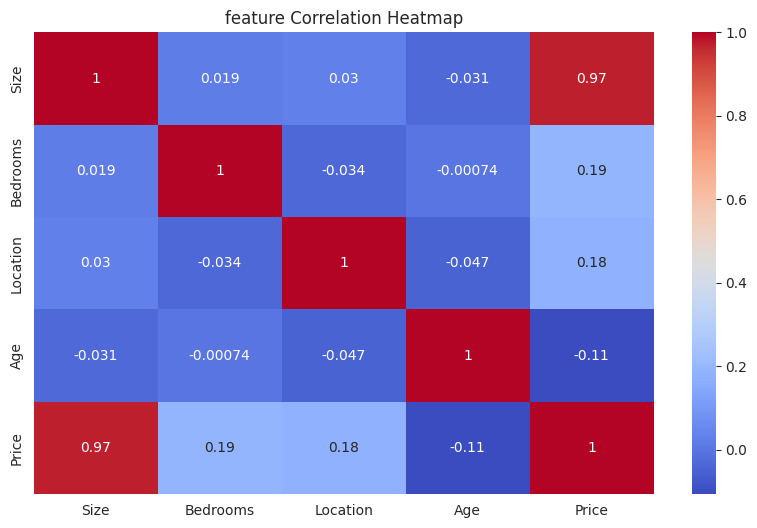

In [ ]:
#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error # Import mean_absolute_error

#split data into features and target
X=df[["Size","Bedrooms","Location","Age"]]
y=df["Price"]

# split data info traning & testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#train linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

#make predictions on the test set
y_pred=model.predict(X_test)

#evaluate the model
mae = mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"\nModel performance:\nMAE: {mae:.2f}, R2 score: {r2:.2f}")


Model performance:
MAE: 10413.84, R2 score: 1.00


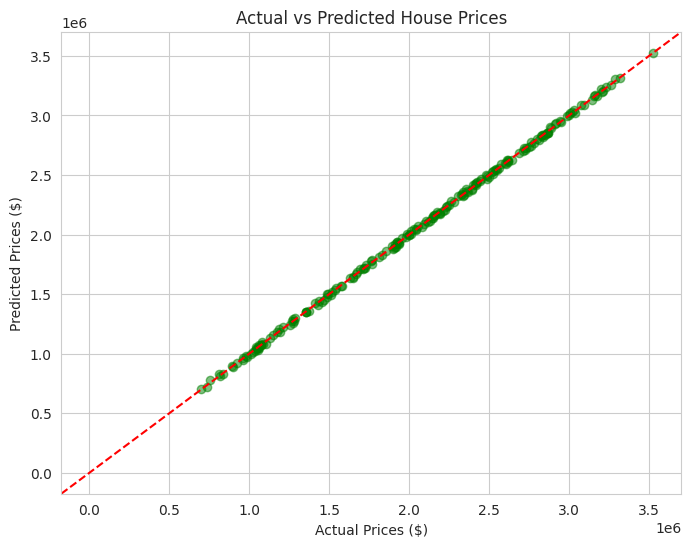

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.5, color="green")

plt.xlabel("Actual Prices ($)")

plt.ylabel("Predicted Prices ($)")

plt.title("Actual vs Predicted House Prices")

plt.axline([0, 0], slope=1, color="red", linestyle="--") #Ideal fit line

plt.show()